In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline

In [3]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
#import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn import metrics   
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, GridSearchCV  
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson
import statsmodels.formula.api
from statsmodels.genmod.families import Poisson

# Uploading Datasets and initial cleaning

In [2]:
xls = pd.ExcelFile('C:\Files\Jash1\FIFA\Career Mode player datasets - FIFA 15-21.xlsx')
Player_data = pd.read_excel(xls, 'FIFA 21')

In [3]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']
Player_data=Player_data.drop(useless_column, axis = 1)

In [4]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
for col in columns:
    Player_data[col] = Player_data[col].astype(str)
for col in columns:
    Player_data[col] = Player_data[col].str.split('+',n=1,expand = True)[0]
Player_data[columns] = Player_data[columns].fillna(0)
Player_data[columns] = Player_data[columns].astype(int)
Player_data.head()

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,66,65,65,65,66,62,52,52,52,62
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,65,61,61,61,65,61,54,54,54,61
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,32,36,36,36,32,32,33,33,33,32
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,64,65,65,65,64,61,60,60,60,61
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,67,62,62,62,67,62,49,49,49,62


# Messi vs Ronaldo 

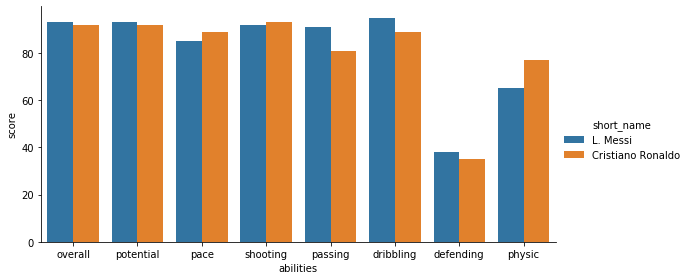

In [5]:
#Messi vs Ronaldo Rivalry
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic']
rival = Player_data.head(2)[column_r]
df = pd.melt(rival, id_vars="short_name", var_name="abilities", value_name="score")
sns.factorplot(x='abilities', y='score', hue='short_name', data=df, kind='bar', size=4, aspect=2)

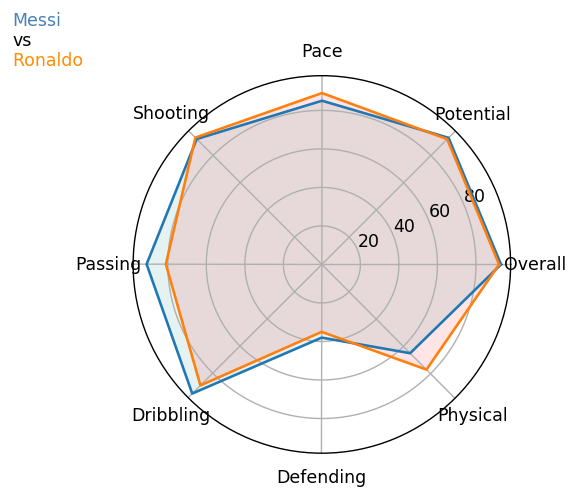

In [6]:
rival = Player_data.head(2)[column_r]
rival= rival.set_index('short_name')
stats=rival.iloc[0].tolist()
stats += stats [:1]

stats2=rival.iloc[1].tolist()
stats2 += stats2 [:1]

def RadarChart(player, data, player2, data2):
    Attributes = ["Overall","Potential","Pace","Shooting","Passing","Dribbling","Defending","Physical"]

    data += data [:1]
    data2 += data2 [:1]
    
    angles = [n / 8 * 2 * 3.14 for n in range(8)]
    angles += angles [:1]
    
    angles2 = [n / 8 * 2 * 3.14 for n in range(8)]
    angles2 += angles2 [:1]
    plt.figure(dpi=125)
    ax = plt.subplot(111, polar=True)
    ax = plt.subplot(111, polar=True)
    
    plt.xticks(angles[:-1],Attributes)

    ax.plot(angles,stats)
    ax.fill(angles, stats, 'teal', alpha=0.1)

    ax.plot(angles2,stats2)
    ax.fill(angles2, stats2, 'red', alpha=0.1)

    plt.figtext(0.1,0.98,player,color="steelblue")
    plt.figtext(0.1,0.94,"vs")
    plt.figtext(0.1,0.9,player2,color="darkorange")
    
    plt.show()
RadarChart("Messi",[94.0, 94.0, 87.0, 92.0, 92.0, 96.0, 39.0, 66.0, 94.0],"Ronaldo",[93.0, 93.0, 90.0, 93.0, 82.0, 89.0, 35.0, 78.0, 93.0])

# Player Data Preprocessing

In [7]:
columns = ['dribbling','defending','physic','passing','shooting','pace']
for col in columns:
    Player_data[col] = Player_data[col].fillna(Player_data[col].median())
Player_data = Player_data.fillna(0)
#Player_data.to_csv('C:\Files\Jash1\FIFA\Player_data.csv')

In [65]:
Player_data=pd.read_csv('C:\Files\Jash1\FIFA\Player_data.csv')
new_player_position = Player_data['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
Player_data =  pd.concat([Player_data,new_player_position],axis = 1)
Player_data =  Player_data.drop('player_positions',axis=1)

In [66]:
Player_data

,Unnamed: 0,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,...,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,...,0,0,0,0,0,0,0,0,0,1
1,3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,...,0,0,0,0,0,0,0,0,0,1
2,5,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,...,0,0,0,0,0,0,0,0,0,0
3,6,K. Mbappé,21,178,73,France,Paris Saint-Germain,French Ligue 1,1.0,90,...,0,0,0,0,0,0,0,0,0,1
4,7,M. ter Stegen,28,187,85,Germany,FC Barcelona,Spain Primera Division,1.0,90,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,18919,J. Akintunde,24,175,75,England,Derry City,Rep. Ireland Airtricity League,1.0,48,...,0,0,0,0,0,0,0,0,0,1
9332,18926,L. Walker,30,196,80,England,Milton Keynes Dons,English League One,3.0,48,...,1,0,0,0,0,0,0,0,0,0
9333,18928,V. Da Silva,17,171,58,England,Oldham Athletic,English League Two,4.0,47,...,0,0,0,0,0,0,0,0,0,1
9334,18929,B. Hough,17,175,65,England,Oldham Athletic,English League Two,4.0,47,...,0,0,0,0,0,0,0,0,0,0


# Uploading Team Ranks dataset and preprocessing

In [67]:
team=pd.read_csv('C:/Files/Jash1/FIFA/fifa_ranking.csv')
team=team[team.rank_date== '2021-05-27']
team=pd.read_csv('C:/Files/Jash1/FIFA/team_ranking.csv')
team=pd.DataFrame(team)
team.drop(team.columns[0],axis=1)
team.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,69,El Salvador,SLV,1341,1341,0,CONCACAF,27-05-2021
1,70,Canada,CAN,1340,1340,0,CONCACAF,27-05-2021
2,71,Bulgaria,BUL,1339,1339,0,UEFA,27-05-2021
3,72,Guinea,GUI,1331,1331,0,CAF,27-05-2021
4,76,Curaçao,CUW,1323,1323,0,CONCACAF,27-05-2021


In [68]:
#Segregating qualifying teams from rest and sorting acc to rank

team.sort_values('rank')
teamslist=['Turkey', 'Italy', 'Wales', 'Switzerland','Denmark', 'Finland', 'Belgium', 'Russia',
                         'Netherlands', 'Ukraine', 'Austria','North Macedonia', 'England', 'Croatia', 
                         'Scotland', 'Czech Republic', 'Spain', 'Sweden', 'Poland', 'Slovakia',
                         'Hungary', 'Portugal', 'France', 'Germany']
team=team[team.country_full.isin(teamslist)]
team=team.sort_values('rank')
#team.to_csv(r'C:/Files/Jash1/FIFA/country_rating.csv')

In [48]:
#Getting Data of teams from 1992 euros to 2021

team21=pd.read_csv('C:/Files/Jash1/FIFA/country_rating.csv',index_col=0)
team21.drop(['country_abrv','previous_points','rank_change','rank_date','confederation'], axis=1,inplace=True)
team_ranking=pd.read_csv('C:/Files/Jash1/FIFA/fifa_ranking.csv')
teams_list=[]

col=['1992-12-31','1996-05-22','2000-05-10','2004-05-12','2008-05-07','2012-05-09','2016-05-05']
for i in range(0,len(col)):
    team=team_ranking[team_ranking.rank_date== col[i]]
    team.drop(team.columns[0],axis=1)
    team.sort_values('rank')
    teamslist=['Turkey', 'Italy', 'Wales', 'Switzerland','Denmark', 'Finland', 'Belgium', 'Russia',
                         'Netherlands', 'Ukraine', 'Austria','North Macedonia', 'England', 'Croatia', 
                         'Scotland', 'Czech Republic', 'Spain', 'Sweden', 'Poland', 'Slovakia',
                         'Hungary', 'Portugal', 'France', 'Germany']
    team=team[team.country_full.isin(teamslist)]
    team=team.sort_values('rank')
    team.drop(['country_abrv','previous_points','rank_change','rank_date','confederation'], axis=1,inplace=True)
    teams_list.append(team)


In [51]:
#Since points varied in earlier datasets, we normalize the total points

min_max_scaler = preprocessing.MinMaxScaler()
team21[['total_points']] = min_max_scaler.fit_transform(team21[['total_points']])
for i in range(0,len(teams_list)):
    teams_list[i][['total_points']] = min_max_scaler.fit_transform(teams_list[i][['total_points']])
    
team92=teams_list[0]
team96=teams_list[1]
team00=teams_list[2]
team04=teams_list[3]
team08=teams_list[4]
team12=teams_list[5]
team16=teams_list[6]

In [53]:
#Getting Player info belonging to these teams and setting them in datasets

Player_data=pd.read_csv('C:\Files\Jash1\FIFA\Player_data.csv',index_col=0)
teamslist=['Turkey', 'Italy', 'Wales', 'Switzerland','Denmark', 'Finland', 'Belgium', 'Russia',
                         'Netherlands', 'Ukraine', 'Austria','North Macedonia', 'England', 'Croatia', 
                         'Scotland', 'Czech Republic', 'Spain', 'Sweden', 'Poland', 'Slovakia',
                         'Hungary', 'Portugal', 'France', 'Germany']
Player_data=Player_data[Player_data.nationality.isin(teamslist)]

team_players=[]
for i in range(0, len(teamslist)):
    x=Player_data[Player_data.nationality==teamslist[i]]
    team_players.append(x)
team_dict={}
for i in range(0,len(teamslist)):
    team_players[i]=team_players[i].sort_values('overall', ascending=False)
    team_dict[teamslist[i]]=team_players[i]


# Exploratory Data Analysis 

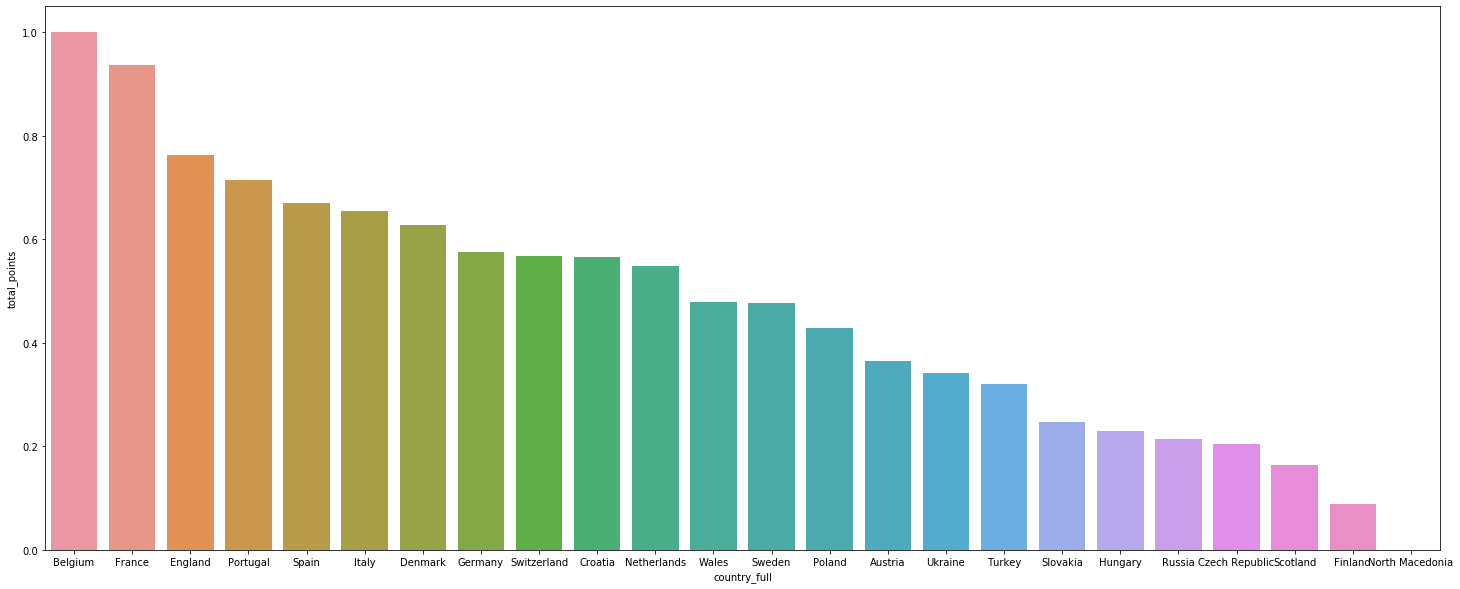

In [79]:
#Comparing the score of each team

fig = plt.figure(figsize =(25, 10))
sns.barplot(x="country_full", y="total_points", data=team21)

In [80]:
#Top Player Column in team21 dataset

top_player=[]
top_player_score=[]
for i in range(0,len(teamslist)):
    top_player.append(team_dict[teamslist[i]].iloc[0,0])
    top_player_score.append(team_dict[teamslist[i]].iloc[0,8])
team21['top player']=top_player
team21['top player score']=top_player_score


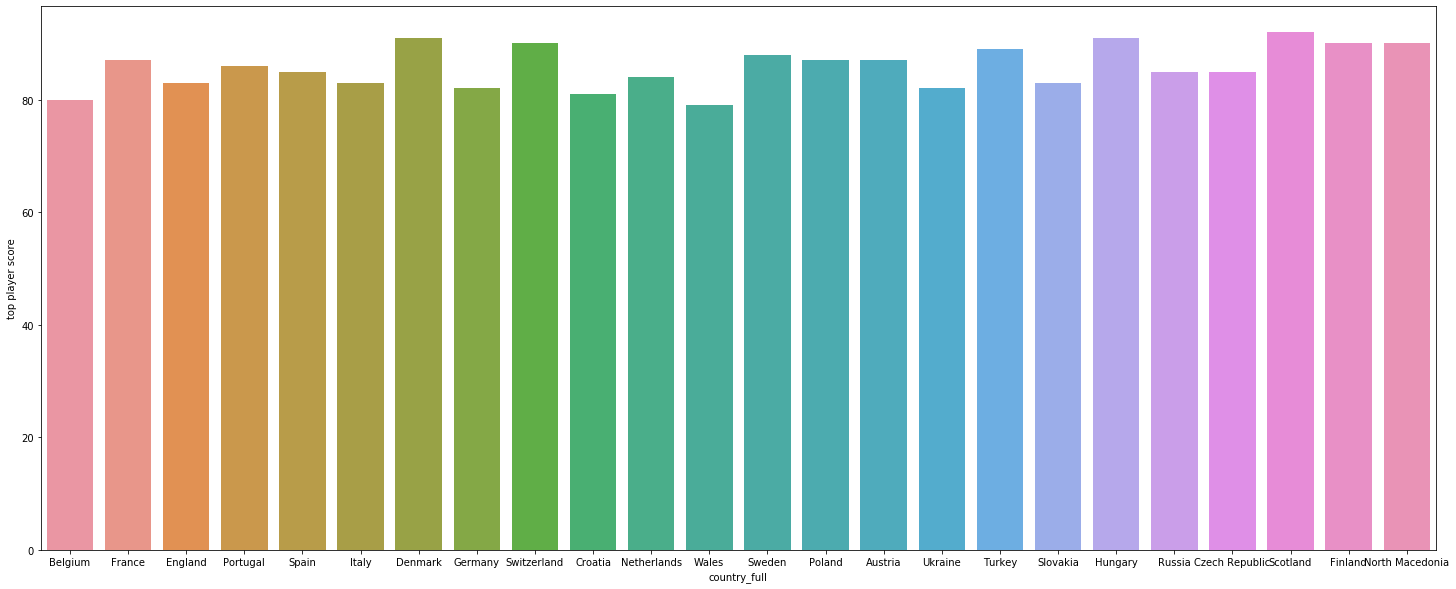

In [81]:
fig = plt.figure(figsize =(25, 10))
sns.barplot(x="country_full", y="top player score", data=team21)

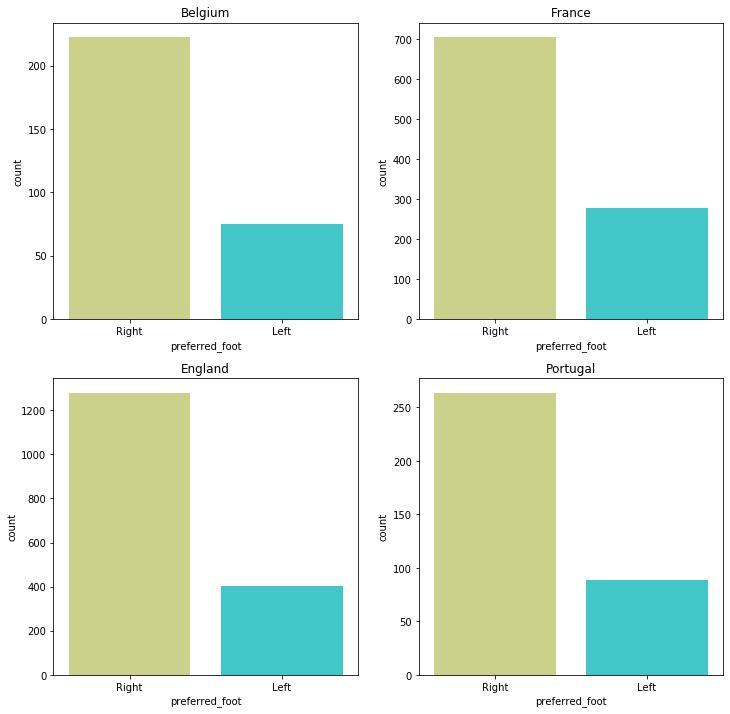

In [82]:
#Top 4 teams stronger foot analysis


fig, ax = plt.subplots(2, 2, figsize=(12,12))
for i in range(0,4):
    ax1 = plt.subplot(221+i)
    #print(team21.iloc[i,1])
    sns.countplot('preferred_foot',data=team_dict[team21.iloc[i,1]][['preferred_foot']],palette='rainbow_r')
    plt.title(team21.iloc[i,1])

In [83]:
team21

,rank,country_full,total_points,top player,top player score
132,1,Belgium,1.000000,C. Söyüncü,80
209,2,France,0.936430,G. Chiellini,87
73,4,England,0.762836,G. Bale,83
72,5,Portugal,0.713936,Y. Sommer,86
71,6,Spain,0.669927,C. Eriksen,85
70,7,Italy,0.655257,L. Hrádecký,83
67,10,Denmark,0.628362,K. De Bruyne,91
65,12,Germany,0.574572,Mário Fernandes,82
75,13,Switzerland,0.567237,V. van Dijk,90
64,14,Croatia,0.564792,Marlos,81


# Getting Dataset ready for Prediction

In [168]:
results = pd.read_csv(r'C:\Files\Jash1\FIFA\results.csv')
dat = pd.read_csv(r'C:\Files\Jash1\FIFA\results.csv')
results = results[ pd.DatetimeIndex(results['date']).year >= 2010]

results["homei"] = 1-results.neutral
results["homej"] = 0
results['margin'] = results.home_score - results.away_score

In [169]:
team_ranking=pd.read_csv('C:/Files/Jash1/FIFA/fifa_ranking.csv')
team_ranking.rank_date.unique()
team_ranking_10 = team_ranking[ pd.DatetimeIndex(team_ranking['rank_date']).year >= 2010]
team_ranking_10 = team_ranking_10[ pd.DatetimeIndex(team_ranking_10['rank_date']).month == 5]

In [170]:
team_ranking_10.rank_date.unique()
teams_list2=[]
teams_list3=[]  #contains all countries
col=['2010-05-26', '2011-05-18', '2012-05-09', '2013-05-09',
       '2014-05-08', '2015-05-07', '2016-05-05', '2017-05-04',
       '2018-05-17', '2021-05-27']

for i in range(0,len(col)):
    team=team_ranking_10[team_ranking_10.rank_date== col[i]]
    team.drop(team.columns[0],axis=1)
    team.sort_values('rank')
    team.index = np.arange(0, len(team))
    teams_list3.append(team)
    team.drop(['country_abrv','previous_points','rank_change','rank_date','confederation'], axis=1,inplace=True)
    teamslist=['Turkey', 'Italy', 'Wales', 'Switzerland','Denmark', 'Finland', 'Belgium', 'Russia',
                         'Netherlands', 'Ukraine', 'Austria','North Macedonia', 'England', 'Croatia', 
                         'Scotland', 'Czech Republic', 'Spain', 'Sweden', 'Poland', 'Slovakia',
                         'Hungary', 'Portugal', 'France', 'Germany']
    team=team[team.country_full.isin(teamslist)]
    team=team.sort_values('rank')
    team.index = np.arange(0, len(team))
    teams_list2.append(team)
teams_list2[0]

x=teams_list2[9]
teams_list2[9]=teams_list2[8]
teams_list2.append(x)
teams_list2.append(x)

x=teams_list3[9]
teams_list3[9]=teams_list3[8]
teams_list3.append(x)
teams_list3.append(x)

min_max_scaler = preprocessing.MinMaxScaler()
for i in range(0,len(teams_list2)):
    teams_list2[i][['total_points']] = min_max_scaler.fit_transform(teams_list2[i][['total_points']])
for i in range(0,len(teams_list3)):
    teams_list3[i][['total_points']] = min_max_scaler.fit_transform(teams_list3[i][['total_points']])
    
year=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
dict_x=dict(zip(year,teams_list2))

year=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
dict_allteams=dict(zip(year,teams_list3))

In [173]:
results=results[results.home_team.isin(teamslist) | results.away_team.isin(teamslist)]
results.index = np.arange(0, len(results))
#results['home_team_score']=dict_allteams[pd.DatetimeIndex(results['date']).year]
home_team_score=[]
away_team_score=[]
dates=pd.DatetimeIndex(results['date']).year
for i in range(0,len(pd.DatetimeIndex(results['date']).year)):
    x=dict_allteams[str(dates[i])]
    home_team_temp=results.iloc[i,1]
    if (home_team_temp in x.country_full.unique()):
        home_team_score.append(x.iloc[x.index[x['country_full'] == home_team_temp][0],3])
    else: 
        home_team_score.append(x.total_points.quantile(0.15))
    away_team_temp=results.iloc[i,2]
    if (away_team_temp in x.country_full.unique()):
        away_team_score.append(x.iloc[x.index[x['country_full'] == away_team_temp][0],3])
    else:
        away_team_score.append(x.total_points.quantile(0.15))

In [175]:
home_team_score=pd.DataFrame(home_team_score)
away_team_score=pd.DataFrame(away_team_score)
results['home_team_score']=home_team_score
results['away_team_score']=away_team_score
#results.to_csv('C:/Files/Jash1/FIFA/Final Data.csv')

In [186]:
results=pd.read_csv(r'C:/Files/Jash1/FIFA/Final Data.csv',index_col=0)
hometeamwins=[]
for i in range(len(results['home_score'])):
    if (results.iloc[i,3]>results.iloc[i,4]):
        hometeamwins.append('Win')
    elif(results.iloc[i,3]==results.iloc[i,4]):
        hometeamwins.append('Draw')
    else:
        hometeamwins.append('Loss')
results['home_team_wins']=pd.DataFrame(hometeamwins)


In [187]:
results=results.drop(['city','country','neutral','homej'],axis=1)
results.tournament.unique()
results=pd.get_dummies(results, columns=["tournament"])
results

,date,home_team,away_team,home_score,away_score,homei,margin,home_team_score,away_team_score,home_team_wins,...,tournament_Cyprus International Tournament,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_King's Cup,tournament_Kirin Cup,tournament_Nations Cup,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UEFA Nations League
0,2010-01-18,Finland,South Korea,0.0,2.0,0,-2.0,0.362508,0.023619,Loss,...,0,0,0,1,0,0,0,0,0,0
1,2010-01-20,Oman,Sweden,0.0,1.0,1,-1.0,0.224705,0.472377,Loss,...,0,0,0,1,0,0,0,0,0,0
2,2010-01-20,Thailand,Poland,1.0,3.0,1,-2.0,0.171322,0.348231,Loss,...,0,0,0,0,1,0,0,0,0,0
3,2010-01-23,Poland,Singapore,6.0,1.0,0,5.0,0.348231,0.119801,Win,...,0,0,0,0,1,0,0,0,0,0
4,2010-01-23,Syria,Sweden,1.0,1.0,1,0.0,0.212911,0.472377,Draw,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,2021-06-22,England,Czech Republic,1.0,0.0,1,1.0,0.900919,0.668029,Win,...,0,0,0,0,0,0,0,1,0,0
2329,2021-06-23,Spain,Slovakia,5.0,0.0,1,5.0,0.862104,0.685393,Win,...,0,0,0,0,0,0,0,1,0,0
2330,2021-06-23,Sweden,Poland,3.0,2.0,0,1.0,0.781410,0.760981,Win,...,0,0,0,0,0,0,0,1,0,0
2331,2021-06-23,Germany,Hungary,2.0,2.0,1,0.0,0.822268,0.678243,Draw,...,0,0,0,0,0,0,0,1,0,0


In [188]:
results['home_score']=results['home_score'].astype('int')
results['away_score']=results['away_score'].astype('int')
results['margin']=results['margin'].astype('int')


In [190]:
trainx=results.copy(deep=True)
trainx1=trainx.drop(['date','away_score','margin','home_team','away_team','home_team_wins'],axis=1)
trainx2=trainx.drop(['date','home_score','margin','home_team','away_team','home_team_wins'],axis=1)
trainx1.rename(columns={'home_score':'target'}, inplace=True)
trainx2.rename(columns={'away_score':'target'}, inplace=True)

,target,homei,home_team_score,away_team_score,tournament_Baltic Cup,tournament_Confederations Cup,tournament_Cyprus International Tournament,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_King's Cup,tournament_Kirin Cup,tournament_Nations Cup,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UEFA Nations League
0,0,0,0.362508,0.023619,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0.224705,0.472377,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0.171322,0.348231,0,0,0,0,0,0,1,0,0,0,0,0
3,6,0,0.348231,0.119801,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0.212911,0.472377,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,1,1,0.900919,0.668029,0,0,0,0,0,0,0,0,0,1,0,0
2329,5,1,0.862104,0.685393,0,0,0,0,0,0,0,0,0,1,0,0
2330,3,0,0.781410,0.760981,0,0,0,0,0,0,0,0,0,1,0,0
2331,2,1,0.822268,0.678243,0,0,0,0,0,0,0,0,0,1,0,0


# Correlation heatmap

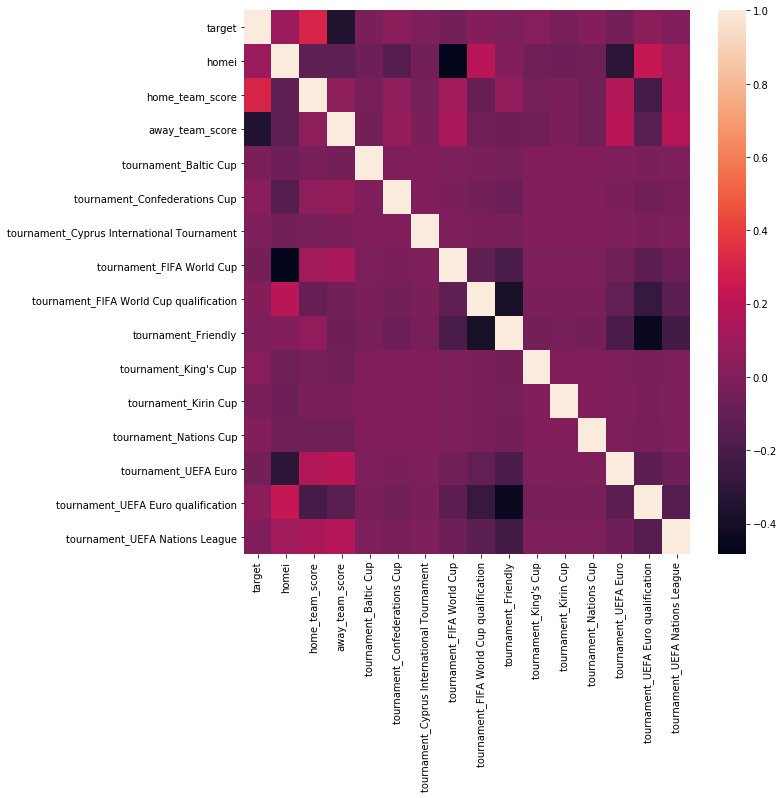

In [191]:
fig = plt.figure(figsize =(10, 10))
sns.heatmap(trainx1.corr())

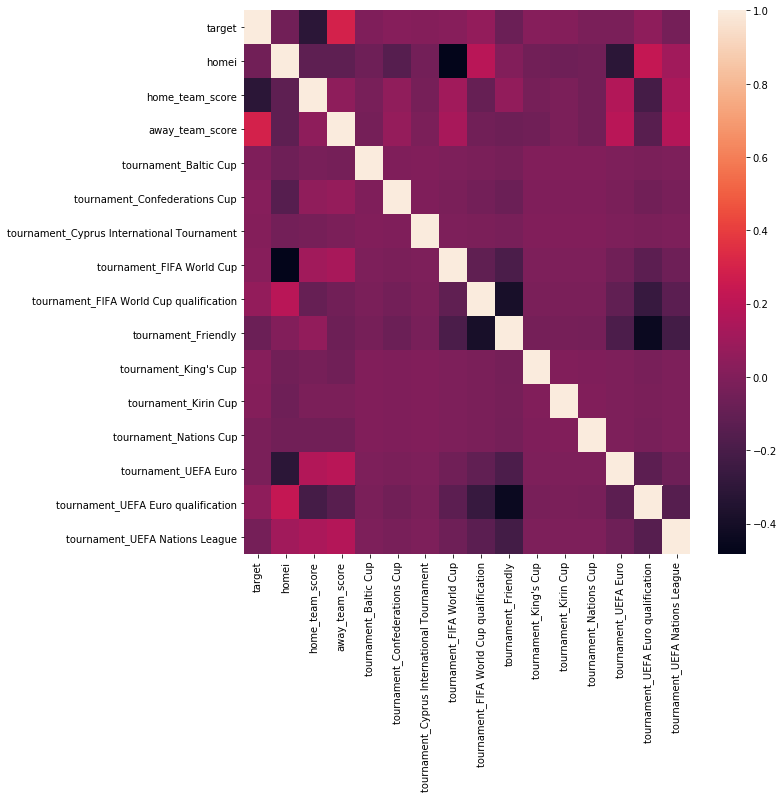

In [102]:
fig = plt.figure(figsize =(10, 10))
sns.heatmap(trainx2.corr())

# Predicting the Winner

In [192]:
trainx=results.copy(deep=True)
trainx=trainx.drop(['date','away_score','home_score','margin','home_team','away_team'],axis=1)
trainx.rename(columns={'home_team_wins':'target'}, inplace=True)
trainx['target']=trainx['target'].astype('category')


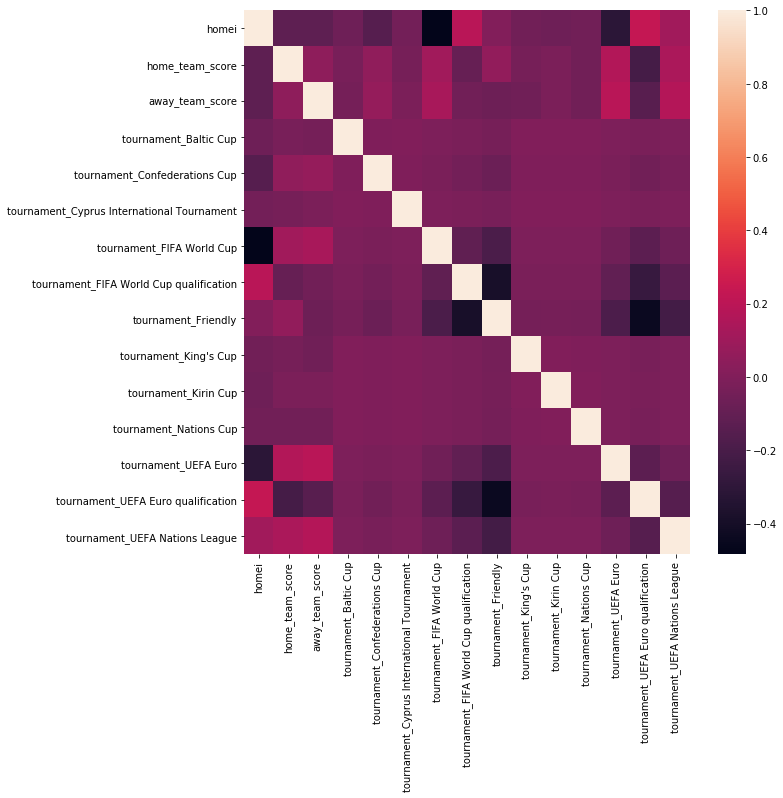

In [193]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(trainx.corr())

# Fitted Various Classification Models

## 1. XGBoost

In [194]:
predictors = [x for x in trainx.columns if x not in ['target']]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 use_label_encoder = False)


In [197]:
#Tuning the XGBoost algo using GridSearchCV


'''param_test= {
    'n_estimators' : range(1, 50, 2)
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_

param_test= {
     'max_depth':range(1,20,2),
 'min_child_weight':range(1,50,2)
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_

param_test= {
     'gamma':[i/10.0 for i in range(0,5)]
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=45, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_

param_test= {
     'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=45, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_

param_test= {
     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=45, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_

param_test= {
     'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=45, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_

param_test= {
     'learning_rate':[0.0001, 0.001, 0.01, 0.1]
}
gsearch = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=45, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1, objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test,n_jobs=4,iid=False, cv=5)
gsearch.fit(trainx[predictors],trainx['target'])
# gsearch1.cv_results_,
gsearch.best_params_, gsearch.best_score_'''

''

''

In [164]:
xgb2=XGBClassifier(use_label_encoder = False,learning_rate =0.1, n_estimators=17, max_depth=3,
 min_child_weight=45, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha = 0,
 reg_lambda = 1,sample_weight=classes_weights,objective= 'multi:softmax', nthread=4, scale_pos_weight=99, seed=27)

In [198]:
X_train,x ,Y_train, y = train_test_split(trainx[predictors], trainx['target'], test_size = 0.2, random_state = 42, stratify = trainx['target'])

model1 = xgb2.fit(X_train,Y_train,sample_weight=classes_weights)
y_pred_xgb2_train = model1.predict(X_train)
y_pred_xgb2_test = model1.predict(x)
#f2score_test = fbeta_score(y,y_pred_xgb4_test,average ='binary',beta=2)
#f2score_train = fbeta_score(Y_train,y_pred_xgb4_train,average='binary',beta=2)
acc_test = accuracy_score(y,y_pred_xgb2_test)
acc_train = accuracy_score(Y_train,y_pred_xgb2_train)


## 2. Gaussian Naive Bayes

In [199]:
NB=GaussianNB()
model3=NB.fit(X_train,Y_train)
ypred_NB=model3.predict(X_train)
ypred_NB_test=model3.predict(x)
acc_NB=accuracy_score(y,ypred_NB_test)
acc_NB_train=accuracy_score(Y_train,ypred_NB)



## 3. Logistic Regression

In [200]:
logreg=LogisticRegression()
model4=logreg.fit(X_train,Y_train)
ypred_LR=model4.predict(X_train)
ypred_LR_test=model4.predict(x)
acc_LR=accuracy_score(y,ypred_LR_test)
acc_LR_train=accuracy_score(Y_train,ypred_LR)
acc_LR, acc_LR_train


## 4. LDA

In [ ]:
LDA = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
search = GridSearchCV(LDA, grid, scoring='accuracy', cv=cv, n_jobs=-1)
model5 = search.fit(X_train,Y_train)
ypred_LDA=model5.predict(X_train)
ypred_LDA_test=model5.predict(x)
acc_LDA=accuracy_score(y,ypred_LDA_test)
acc_LDA_train=accuracy_score(Y_train,ypred_LDA)


## 5. Random Forest

In [202]:
#Tuning Random Forest Classifier
'''rf=RandomForestClassifier()
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gsearch = gridF.fit(trainx[predictors], trainx['target'])
gsearch.best_params_, gsearch.best_score_

rf=RandomForestClassifier(n_estimators = 100, max_depth = 25,  
              min_samples_split = 100, 
             min_samples_leaf = 1)'''
''

''

In [203]:
rf=RandomForestClassifier()
rf=RandomForestClassifier(n_estimators = 100, max_depth = 25,  
              min_samples_split = 100, 
             min_samples_leaf = 1)
model6=rf.fit(X_train,Y_train)
ypred_RF=model6.predict(X_train)
ypred_RF_test=model6.predict(x)
acc_RF=accuracy_score(y,ypred_RF_test)
acc_RF_train=accuracy_score(Y_train,ypred_RF)


## KFold Cross Validation to select best Model

In [204]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
scoresxgb = cross_val_score(model2, trainx[predictors], trainx['target'], cv=kfold)
MSE_xgb= scoresxgb.mean() * (-1)

scoresLR = cross_val_score(model4, trainx[predictors], trainx['target'], cv=kfold)
MSE_LR= scoresLR.mean() * (-1)

scoresNB = cross_val_score(model3, trainx[predictors], trainx['target'], cv=kfold)
MSE_NB= scoresNB.mean() * (-1)

scoresLDA = cross_val_score(model5, trainx[predictors], trainx['target'], cv=kfold)
MSE_LDA= scoresLDA.mean() * (-1)

scoresRF = cross_val_score(model6, trainx[predictors], trainx['target'], cv=kfold)
MSE_RF= scoresRF.mean() * (-1)


# Predicting the EURO 2021 Group Stage Matches

In [206]:
testx=pd.read_csv(r'C:/Files/Jash1/FIFA/test.csv')
pred_xgb=model2.predict(testx[predictors])
pred_lr=model4.predict(testx[predictors])

Prediction accuracy of 69% was obtained using XGBoost Classifier